In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Define the directory
output_dir = '/content/drive/MyDrive/Data/ML_Project_Data'

# Load the DataFrames
# X_CV = pd.read_csv(os.path.join(output_dir, 'X_CV.csv'))
# y_CV = pd.read_csv(os.path.join(output_dir, 'y_CV.csv'))

# X_CV = pd.read_csv(os.path.join(output_dir, 'X_CV.csv'))
# y_CV = pd.read_csv(os.path.join(output_dir, 'y_CV.csv'))

X_train = pd.read_csv(os.path.join(output_dir, 'X_train.csv'))
y_train = pd.read_csv(os.path.join(output_dir, 'y_train.csv'))

# X_train_W_outliers = pd.read_csv(os.path.join(output_dir, 'X_train_W_outliers.csv'))
# y_train_W_outliers = pd.read_csv(os.path.join(output_dir, 'y_train_W_outliers.csv'))

X_val = pd.read_csv(os.path.join(output_dir, 'X_val.csv'))
y_val = pd.read_csv(os.path.join(output_dir, 'y_val.csv'))

# X_test = pd.read_csv(os.path.join(output_dir, 'X_test.csv'))


In [ ]:
X_CV_W_outliers = pd.read_csv(os.path.join(output_dir, 'X_CV_W_outliers.csv'))
y_CV_W_outliers = pd.read_csv(os.path.join(output_dir, 'y_CV_W_outliers.csv'))

In [ ]:
# print("X_CV shape:", X_CV.shape)
# print("y_CV shape:", y_CV.shape)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

print("X_train_W_outliers shape:", X_train_W_outliers.shape)
print("y_train_W_outliers shape:", y_train_W_outliers.shape)

print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

print("X_test shape:", X_test.shape)

X_train shape: (2334900, 13)
y_train shape: (2334900, 1)
X_train_W_outliers shape: (2493556, 13)
y_train_W_outliers shape: (2493556, 1)
X_val shape: (623389, 13)
y_val shape: (623389, 1)
X_test shape: (2077964, 14)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, matthews_corrcoef
from sklearn.ensemble import AdaBoostClassifier ,BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
def evaluate_model(name, model, X_train, y_train, X_val, y_val):
    print(f"\n=== {name} ===")

    # Train Predictions
    y_train_pred = model.predict(X_train)
    print("---- Train Metrics ----")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
    print(f"Train MCC: {matthews_corrcoef(y_train, y_train_pred):.4f}")

    # Validation Predictions
    y_val_pred = model.predict(X_val)
    print("---- Validation Metrics ----")
    print(confusion_matrix(y_val, y_val_pred))
    print(classification_report(y_val, y_val_pred))
    print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")
    print(f"Validation MCC: {matthews_corrcoef(y_val, y_val_pred):.4f}")

# DT

In [ ]:
# try to solve overfitting problem of the default parm model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
evaluate_model("Decision Tree", dt_model, X_train, y_train, X_val, y_val)


=== Decision Tree ===
---- Train Metrics ----
[[1071450     123]
 [    780 1262547]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1071573
           1       1.00      1.00      1.00   1263327

    accuracy                           1.00   2334900
   macro avg       1.00      1.00      1.00   2334900
weighted avg       1.00      1.00      1.00   2334900

Train Accuracy: 0.9996
Train MCC: 0.9992
---- Validation Metrics ----
[[275625   6685]
 [  6571 334508]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    282310
           1       0.98      0.98      0.98    341079

    accuracy                           0.98    623389
   macro avg       0.98      0.98      0.98    623389
weighted avg       0.98      0.98      0.98    623389

Validation Accuracy: 0.9787
Validation MCC: 0.9571


In [ ]:
# try to solve overfitting problem of the default parm model
dt_model = DecisionTreeClassifier(random_state=42,max_depth=14)
dt_model.fit(X_train, y_train)
evaluate_model("Decision Tree", dt_model, X_train, y_train, X_val, y_val)


=== Decision Tree ===
---- Train Metrics ----
[[1057976   13597]
 [  20048 1243279]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98   1071573
           1       0.99      0.98      0.99   1263327

    accuracy                           0.99   2334900
   macro avg       0.99      0.99      0.99   2334900
weighted avg       0.99      0.99      0.99   2334900

Train Accuracy: 0.9856
Train MCC: 0.9710
---- Validation Metrics ----
[[277913   4397]
 [  6176 334903]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    282310
           1       0.99      0.98      0.98    341079

    accuracy                           0.98    623389
   macro avg       0.98      0.98      0.98    623389
weighted avg       0.98      0.98      0.98    623389

Validation Accuracy: 0.9830
Validation MCC: 0.9658


In [ ]:
# try to solve overfitting problem of the default parm model
dt_model = DecisionTreeClassifier(random_state=42,ccp_alpha=0.001)
dt_model.fit(X_train, y_train)
evaluate_model("Decision Tree", dt_model, X_train, y_train, X_val, y_val)


=== Decision Tree ===
---- Train Metrics ----
[[1021272   50301]
 [  56021 1207306]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95   1071573
           1       0.96      0.96      0.96   1263327

    accuracy                           0.95   2334900
   macro avg       0.95      0.95      0.95   2334900
weighted avg       0.95      0.95      0.95   2334900

Train Accuracy: 0.9545
Train MCC: 0.9084
---- Validation Metrics ----
[[267647  14663]
 [ 18967 322112]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94    282310
           1       0.96      0.94      0.95    341079

    accuracy                           0.95    623389
   macro avg       0.95      0.95      0.95    623389
weighted avg       0.95      0.95      0.95    623389

Validation Accuracy: 0.9461
Validation MCC: 0.8914


In [ ]:
# try to solve overfitting problem of the default parm model
dt_model = DecisionTreeClassifier(random_state=42,ccp_alpha=0.0001)
dt_model.fit(X_train, y_train)
evaluate_model("Decision Tree", dt_model, X_train, y_train, X_val, y_val)


=== Decision Tree ===
---- Train Metrics ----
[[1045527   26046]
 [  25901 1237426]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98   1071573
           1       0.98      0.98      0.98   1263327

    accuracy                           0.98   2334900
   macro avg       0.98      0.98      0.98   2334900
weighted avg       0.98      0.98      0.98   2334900

Train Accuracy: 0.9778
Train MCC: 0.9552
---- Validation Metrics ----
[[274568   7742]
 [  7783 333296]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97    282310
           1       0.98      0.98      0.98    341079

    accuracy                           0.98    623389
   macro avg       0.97      0.97      0.97    623389
weighted avg       0.98      0.98      0.98    623389

Validation Accuracy: 0.9751
Validation MCC: 0.9497


# Bagging

In [ ]:
# Bagging with Decision Tree
bagging_model = BaggingClassifier(estimator =DecisionTreeClassifier(), n_estimators=50, random_state=42,n_jobs=-1)
bagging_model.fit(X_train, y_train)
evaluate_model("Bagging (Decision Tree)", bagging_model, X_train, y_train, X_val, y_val)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_bagging.py:878: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



=== Bagging (Decision Tree) ===
---- Train Metrics ----
[[1071056     517]
 [    729 1262598]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1071573
           1       1.00      1.00      1.00   1263327

    accuracy                           1.00   2334900
   macro avg       1.00      1.00      1.00   2334900
weighted avg       1.00      1.00      1.00   2334900

Train Accuracy: 0.9995
Train MCC: 0.9989
---- Validation Metrics ----
[[278523   3787]
 [  4254 336825]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99    282310
           1       0.99      0.99      0.99    341079

    accuracy                           0.99    623389
   macro avg       0.99      0.99      0.99    623389
weighted avg       0.99      0.99      0.99    623389

Validation Accuracy: 0.9871
Validation MCC: 0.9740


In [ ]:
n_estimators_range = [10, 25, 50, 75, 100, 150, 200]

mcc_scores = []

for n in n_estimators_range:
    print(f"Training with {n} estimators...")
    model = BaggingClassifier(
        estimator=DecisionTreeClassifier(),
        n_estimators=n,
        random_state=42,
        n_jobs=-1
    )
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    mcc = matthews_corrcoef(y_val, y_val_pred)
    mcc_scores.append(mcc)
    print(f"n_estimators: {n}, MCC: {mcc:.4f}")

Training with 10 estimators...


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_bagging.py:878: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


n_estimators: 10, MCC: 0.9727
Training with 25 estimators...


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_bagging.py:878: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


n_estimators: 25, MCC: 0.9740
Training with 50 estimators...


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_bagging.py:878: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyboardInterrupt: 

In [ ]:
# it will take alot of time to do it -> I will try on a sample of the data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_small, _, y_small, _ = train_test_split(X_train, y_train, train_size=200_000, stratify=y_train, random_state=42)

n_estimators_range = [10, 25, 50, 75, 100, 150, 200,300]
mcc_scores = []

for n in n_estimators_range:
    model = BaggingClassifier(
        estimator=DecisionTreeClassifier(),
        n_estimators=n,
        random_state=42,
        n_jobs=-1,
        max_samples=0.1
    )
    model.fit(X_small, y_small)
    y_val_pred = model.predict(X_val)
    mcc = matthews_corrcoef(y_val, y_val_pred)
    mcc_scores.append(mcc)
    print(f"n_estimators: {n}, MCC: {mcc:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_bagging.py:878: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


n_estimators: 10, MCC: 0.9637


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_bagging.py:878: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


n_estimators: 25, MCC: 0.9624


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_bagging.py:878: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


n_estimators: 50, MCC: 0.9637


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_bagging.py:878: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


n_estimators: 75, MCC: 0.9632


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_bagging.py:878: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


n_estimators: 100, MCC: 0.9644


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_bagging.py:878: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


n_estimators: 150, MCC: 0.9649


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_bagging.py:878: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


n_estimators: 200, MCC: 0.9649


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_bagging.py:878: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


n_estimators: 300, MCC: 0.9650


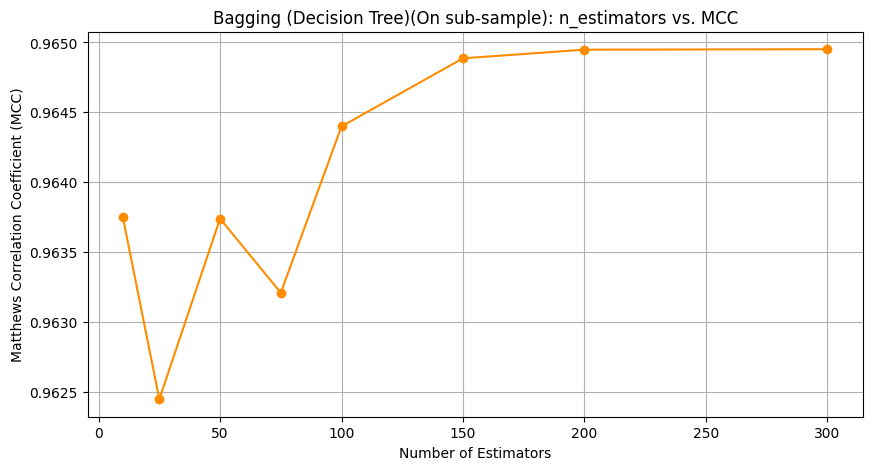

In [ ]:
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(n_estimators_range, mcc_scores, marker='o', color='darkorange')
plt.title('Bagging (Decision Tree)(On sub-sample): n_estimators vs. MCC')
plt.xlabel('Number of Estimators')
plt.ylabel('Matthews Correlation Coefficient (MCC)')
plt.grid(True)
plt.show()

In [ ]:
# from the graph the best n_estimator is 200

In [ ]:
bagging_model = BaggingClassifier(estimator =DecisionTreeClassifier(), n_estimators=200, random_state=42,n_jobs=-1)
bagging_model.fit(X_train, y_train)
evaluate_model("Bagging (Decision Tree)(200 estimators)", bagging_model, X_train, y_train, X_val, y_val)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_bagging.py:878: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



=== Bagging (Decision Tree)(200 estimators) ===
---- Train Metrics ----
[[1071157     416]
 [    488 1262839]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1071573
           1       1.00      1.00      1.00   1263327

    accuracy                           1.00   2334900
   macro avg       1.00      1.00      1.00   2334900
weighted avg       1.00      1.00      1.00   2334900

Train Accuracy: 0.9996
Train MCC: 0.9992
---- Validation Metrics ----
[[278501   3809]
 [  4074 337005]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    282310
           1       0.99      0.99      0.99    341079

    accuracy                           0.99    623389
   macro avg       0.99      0.99      0.99    623389
weighted avg       0.99      0.99      0.99    623389

Validation Accuracy: 0.9874
Validation MCC: 0.9745


In [ ]:
test_predictions = bagging_model.predict(X_test.drop(columns=['id']))

submission = pd.DataFrame({
    'id': X_test['id'],
    'prediction': test_predictions
})
submission = submission.replace({0: 'e', 1: 'p'})
submission.to_csv("submission_bagging_200_estimator.csv", index=False)

In [ ]:
# Boosting with AdaBoost
ada_model = AdaBoostClassifier(n_estimators=100,learning_rate=1.0,random_state=42)
# Fit model
ada_model.fit(X_train, y_train)
# Evaluate model
evaluate_model("AdaBoost", ada_model, X_train, y_train, X_val, y_val)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



=== AdaBoost ===
---- Train Metrics ----
[[ 817145  254428]
 [ 258688 1004639]]
              precision    recall  f1-score   support

           0       0.76      0.76      0.76   1071573
           1       0.80      0.80      0.80   1263327

    accuracy                           0.78   2334900
   macro avg       0.78      0.78      0.78   2334900
weighted avg       0.78      0.78      0.78   2334900

Train Accuracy: 0.7802
Train MCC: 0.5576
---- Validation Metrics ----
[[215320  66990]
 [ 72270 268809]]
              precision    recall  f1-score   support

           0       0.75      0.76      0.76    282310
           1       0.80      0.79      0.79    341079

    accuracy                           0.78    623389
   macro avg       0.77      0.78      0.77    623389
weighted avg       0.78      0.78      0.78    623389

Validation Accuracy: 0.7766
Validation MCC: 0.5500


In [ ]:
# XGBoost Classifier
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluate
evaluate_model("XGBoost", xgb_model, X_train, y_train, X_val, y_val)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:00:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



=== XGBoost ===
---- Train Metrics ----
[[1049511   22062]
 [  30124 1233203]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98   1071573
           1       0.98      0.98      0.98   1263327

    accuracy                           0.98   2334900
   macro avg       0.98      0.98      0.98   2334900
weighted avg       0.98      0.98      0.98   2334900

Train Accuracy: 0.9776
Train MCC: 0.9550
---- Validation Metrics ----
[[274710   7600]
 [  8112 332967]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97    282310
           1       0.98      0.98      0.98    341079

    accuracy                           0.97    623389
   macro avg       0.97      0.97      0.97    623389
weighted avg       0.97      0.97      0.97    623389

Validation Accuracy: 0.9748
Validation MCC: 0.9491


In [ ]:
xgb_model = XGBClassifier(
    use_label_encoder=False,
    n_estimators=500)

xgb_model.fit(X_train, y_train,eval_set=[(X_val, y_val)],verbose=True)
evaluate_model("XGBoost", xgb_model, X_train, y_train, X_val, y_val)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:17:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-logloss:0.63606
[1]	validation_0-logloss:0.59508
[2]	validation_0-logloss:0.56033
[3]	validation_0-logloss:0.52752
[4]	validation_0-logloss:0.50336
[5]	validation_0-logloss:0.47842
[6]	validation_0-logloss:0.45815
[7]	validation_0-logloss:0.43954
[8]	validation_0-logloss:0.41961
[9]	validation_0-logloss:0.40313
[10]	validation_0-logloss:0.38653
[11]	validation_0-logloss:0.37465
[12]	validation_0-logloss:0.35901
[13]	validation_0-logloss:0.35125
[14]	validation_0-logloss:0.34444
[15]	validation_0-logloss:0.33594
[16]	validation_0-logloss:0.33017
[17]	validation_0-logloss:0.31696
[18]	validation_0-logloss:0.31137
[19]	validation_0-logloss:0.30071
[20]	validation_0-logloss:0.29563
[21]	validation_0-logloss:0.28777
[22]	validation_0-logloss:0.28339
[23]	validation_0-logloss:0.28013
[24]	validation_0-logloss:0.27066
[25]	validation_0-logloss:0.26698
[26]	validation_0-logloss:0.26306
[27]	validation_0-logloss:0.25497
[28]	validation_0-logloss:0.25260
[29]	validation_0-loglos

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb

In [ ]:
print(XGBClassifier.__module__)

xgboost.sklearn


In [ ]:
def mcc_eval(preds, dmatrix):
    from sklearn.metrics import matthews_corrcoef
    y_true = dmatrix.get_label()
    y_pred_binary = (preds > 0.5).astype(int)  # Convert predictions to binary
    mcc = matthews_corrcoef(y_true, y_pred_binary)  # Calculate MCC
    return [("MCC", mcc)]

In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

params = {
    'objective': 'binary:logistic',
    'max_depth': 6,
    'learning_rate': 0.1,
    'eval_metric': 'logloss',
    'tree_method': 'hist'
}

# Train using xgb.train with custom eval
bst = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=[(dval, 'validation')],
    early_stopping_rounds=30,
    feval=mcc_eval,  # custom MCC metric
    verbose_eval=True
)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


[0]	validation-logloss:0.63606	validation-MCC:0.00000
[1]	validation-logloss:0.59508	validation-MCC:0.32305
[2]	validation-logloss:0.56033	validation-MCC:0.57508
[3]	validation-logloss:0.52752	validation-MCC:0.64430
[4]	validation-logloss:0.50336	validation-MCC:0.66636
[5]	validation-logloss:0.47842	validation-MCC:0.69435
[6]	validation-logloss:0.45815	validation-MCC:0.71066
[7]	validation-logloss:0.43954	validation-MCC:0.73292
[8]	validation-logloss:0.41961	validation-MCC:0.74192
[9]	validation-logloss:0.40313	validation-MCC:0.74443
[10]	validation-logloss:0.38653	validation-MCC:0.76507
[11]	validation-logloss:0.37465	validation-MCC:0.76871
[12]	validation-logloss:0.35901	validation-MCC:0.78547
[13]	validation-logloss:0.35125	validation-MCC:0.78618
[14]	validation-logloss:0.34444	validation-MCC:0.78936
[15]	validation-logloss:0.33594	validation-MCC:0.78656
[16]	validation-logloss:0.33017	validation-MCC:0.79447
[17]	validation-logloss:0.31696	validation-MCC:0.82014
[18]	validation-logl

In [ ]:
print("\n=== XGBoost custom MCC  ===")

y_train_pred = (bst.predict(xgb.DMatrix(X_train)) > 0.5).astype(int)
y_val_pred = (bst.predict(xgb.DMatrix(X_val)) > 0.5).astype(int)

# Train Metrics
print("---- Train Metrics ----")
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Train MCC: {matthews_corrcoef(y_train, y_train_pred):.4f}")

# Validation Metrics
print("---- Validation Metrics ----")
print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))
print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")
print(f"Validation MCC: {matthews_corrcoef(y_val, y_val_pred):.4f}")


=== XGBoost custom MCC  ===
---- Train Metrics ----
[[1062312    9261]
 [  12465 1250862]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99   1071573
           1       0.99      0.99      0.99   1263327

    accuracy                           0.99   2334900
   macro avg       0.99      0.99      0.99   2334900
weighted avg       0.99      0.99      0.99   2334900

Train Accuracy: 0.9907
Train MCC: 0.9813
---- Validation Metrics ----
[[279121   3189]
 [  3501 337578]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    282310
           1       0.99      0.99      0.99    341079

    accuracy                           0.99    623389
   macro avg       0.99      0.99      0.99    623389
weighted avg       0.99      0.99      0.99    623389

Validation Accuracy: 0.9893
Validation MCC: 0.9783


In [ ]:
test_predictions = (bst.predict(xgb.DMatrix(X_test.drop(columns=['id']))) > 0.5).astype(int)

submission = pd.DataFrame({
    'id': X_test['id'],
    'prediction': test_predictions
})


In [ ]:
submission = submission.replace({0: 'e', 1: 'p'})

In [ ]:
submission.head()

,id,prediction
0,3116945.0,e
1,3116946.0,p
2,3116947.0,p
3,3116948.0,p
4,3116949.0,e


In [ ]:
submission.to_csv("submission.csv", index=False)

In [ ]:
# try XGBoost with all the data with outliers

In [ ]:
# XGBoost Classifier
xgb_model = XGBClassifier(n_estimators=500, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_W_outliers, y_train_W_outliers)
evaluate_model("XGBoost", xgb_model, X_train_W_outliers, y_train_W_outliers, X_val, y_val)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:23:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



=== XGBoost ===
---- Train Metrics ----
[[1117862   11377]
 [  14630 1349687]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99   1129239
           1       0.99      0.99      0.99   1364317

    accuracy                           0.99   2493556
   macro avg       0.99      0.99      0.99   2493556
weighted avg       0.99      0.99      0.99   2493556

Train Accuracy: 0.9896
Train MCC: 0.9790
---- Validation Metrics ----
[[279336   2974]
 [  3790 337289]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    282310
           1       0.99      0.99      0.99    341079

    accuracy                           0.99    623389
   macro avg       0.99      0.99      0.99    623389
weighted avg       0.99      0.99      0.99    623389

Validation Accuracy: 0.9891
Validation MCC: 0.9781


In [ ]:
test_predictions = xgb_model.predict(X_test.drop(columns=['id']))

submission = pd.DataFrame({
    'id': X_test['id'],
    'prediction': test_predictions
})
submission = submission.replace({0: 'e', 1: 'p'})
submission.to_csv("submission_xgb_500_estimator_W_outliers.csv", index=False)

In [ ]:
# XGBoost Classifier
xgb_model = XGBClassifier(n_estimators=500, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_CV_W_outliers, y_CV_W_outliers)

# Evaluate
# evaluate_model("XGBoost", xgb_model, X_CV_W_outliers, y_CV_W_outliers, X_val, y_val)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:17:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
test_predictions = xgb_model.predict(X_test.drop(columns=['id']))

submission = pd.DataFrame({
    'id': X_test['id'],
    'prediction': test_predictions
})
submission = submission.replace({0: 'e', 1: 'p'})
submission.to_csv("submission_xgb_500_estimator_all_W_outliers.csv", index=False)

In [ ]:
# till now the best performance it RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


n_estimators: 10, MCC: 0.9647


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


n_estimators: 20, MCC: 0.9692


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


n_estimators: 30, MCC: 0.9702


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


n_estimators: 40, MCC: 0.9714


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


n_estimators: 50, MCC: 0.9718


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


n_estimators: 75, MCC: 0.9725


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


n_estimators: 100, MCC: 0.9728


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


n_estimators: 150, MCC: 0.9731


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


n_estimators: 200, MCC: 0.9731


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


n_estimators: 300, MCC: 0.9731


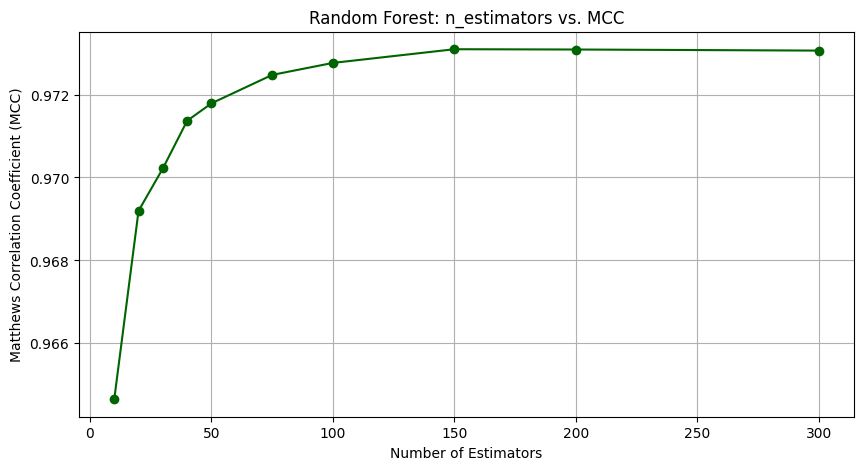

In [ ]:
n_estimators_range = [10, 20, 30, 40, 50, 75, 100, 150, 200,300]
mcc_scores = []

for n in n_estimators_range:
    model = RandomForestClassifier(
        n_estimators=n,
        random_state=42,
        n_jobs=-1,
        max_samples=0.1
    )
    model.fit(X_small, y_small)
    y_val_pred = model.predict(X_val)
    mcc = matthews_corrcoef(y_val, y_val_pred)
    mcc_scores.append(mcc)
    print(f"n_estimators: {n}, MCC: {mcc:.4f}")

# Plot
plt.figure(figsize=(10, 5))
plt.plot(n_estimators_range, mcc_scores, marker='o', color='darkgreen')
plt.title('Random Forest: n_estimators vs. MCC')
plt.xlabel('Number of Estimators')
plt.ylabel('Matthews Correlation Coefficient (MCC)')
plt.grid(True)
plt.show()

In [ ]:
rf_model = RandomForestClassifier(n_estimators=150, random_state=42)
rf_model.fit(X_CV_W_outliers, y_CV_W_outliers)
# evaluate_model("Random Forest", rf_model, X_CV_W_outliers, y_CV_W_outliers, X_val, y_val)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=150, random_state=42)

In [ ]:
test_predictions = rf_model.predict(X_test.drop(columns=['id']))

submission = pd.DataFrame({
    'id': X_test['id'],
    'prediction': test_predictions
})
submission = submission.replace({0: 'e', 1: 'p'})
submission.to_csv("submission_rf_150_estimator_all_W_outliers.csv", index=False)